In [1]:
import re
import sys
import datetime
sys.path.append("..")
import requests


# Fetch History data per day
def fetch_data(code,STname):
    Try = ['0.','1.','9.']
    times = 0
    for i in Try:
        STcode = i + code
        print(STcode)
        url = 'http://push2his.eastmoney.com/api/qt/stock/kline/get?cb=jQuery112407292853170751195_1640541924684&fields1=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf6&fields2=f51%2Cf52%2Cf53%2Cf54%2Cf55%2Cf56%2Cf57%2Cf58%2Cf59%2Cf60%2Cf61&ut=7eea3edcaed734bea9cbfc24409ed989&klt=101&fqt=1&secid=' + STcode + '&beg=0&end=20500000&_=1640541924720'
        text = (requests.get(url)).text
        STname_fetch = text[text.find('\"name\":\"') + 8:text.find('\"name\":"') + 8 + len(STname)]
        STdata = text[text.find('\"data\":') + 7:text.find('\"data\":') + 11]
        times += 1
        if STname_fetch == STname and STdata != 'null':
            ST = text[text.find('\"klines\":') + 9:text.rfind(']}})') + 1]
            return ST
        else:
            if times < 3: continue
            else:
                raise ValueError('Wrong STcode or STname. Please check again.')



In [2]:
import json
import pandas as pd

# Convert text into Dataframe
a = input('Please enter your interested Stock\'s code: ')
b = input('Please enter your interested Stcode\'s name: ')
dt = fetch_data(a,b)
df = []
x = json.loads(dt)

for item in x:
    item = list(item.split(','))
    df.append(item)

#columns=['Date','Opening Price', 'Closing Price', 'Highest Price','Lowest Price','Trade Volumn','Turnover','price amplitude','Fluctuation(in percent)','Fluctuation(in price)','Turnover Rate']
df = pd.DataFrame(df,columns=['Date','Opening Price', 'Closing Price', 
                              'Highest Price','Lowest Price','Trade Volumn','Turnover',
                              'price amplitude','Fluctuation(in percent)','Fluctuation(in price)','Turnover Rate'])


# Tidy
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'])
min_date = min(df['Date'])
max_date = max(df['Date'])
df = df.set_index('Date')
df = df.astype(float)
df.head()

Please enter your interested Stock's code: 600000
Please enter your interested Stcode's name: 浦发银行
0.600000
1.600000


,Opening Price,Closing Price,Highest Price,Lowest Price,Trade Volumn,Turnover,price amplitude,Fluctuation(in percent),Fluctuation(in price),Turnover Rate
Date,,,,,,,,,,
1999-11-10,0.40,0.13,0.44,0.02,1740850.0,4.859102e+09,-16.41,105.08,2.69,54.40
1999-11-11,0.11,0.13,0.23,0.10,294034.0,8.215820e+08,100.00,0.00,0.00,9.19
1999-11-12,0.15,0.18,0.21,0.14,150079.0,4.215910e+08,53.85,38.46,0.05,4.69
1999-11-15,0.20,0.13,0.21,0.12,119210.0,3.329520e+08,50.00,-27.78,-0.05,3.73
1999-11-16,0.15,-0.05,0.17,-0.06,232231.0,6.289080e+08,176.92,-138.46,-0.18,7.26


In [3]:
# Subsection
start_date = pd.to_datetime(input('Please input the start date of the time interval you are interested in (yyyy-mm-dd): '))
end_date = pd.to_datetime(input('Please input the end date of the time interval you are interested in (yyyy-mm-dd): '))
start_date = max(start_date,min_date)
end_date = min(end_date,max_date)
print('The time interval we are using is from {} to {}'.format(start_date,end_date))

df_foc = df[start_date:end_date]
df = df.reset_index()
df_resample_mon = df_foc.resample(rule = 'M', label='right', closed='right').mean()
df_resample_year = df_foc.resample(rule = 'Y', label='right', closed='right').mean()

Please input the start date of the time interval you are interested in: 2000-01-01
Please input the end date of the time interval you are interested in: 2021-12-31
The time interval we are using is from 2000-01-01 00:00:00 to 2021-12-27 00:00:00


In [4]:
df_resample_mon

,Opening Price,Closing Price,Highest Price,Lowest Price,Trade Volumn,Turnover,price amplitude,Fluctuation(in percent),Fluctuation(in price),Turnover Rate
Date,,,,,,,,,,
2000-01-31,-0.278947,-0.280000,-0.216316,-0.335789,103426.526316,2.614006e+08,-4.854406e+15,64.520526,0.002105,2.793158
2000-02-29,-0.240000,-0.250833,-0.154167,-0.334167,146290.416667,3.724143e+08,-1.356333e+01,-36.860833,0.001667,3.656667
2000-03-31,-0.211304,-0.215652,-0.129130,-0.267826,108222.826087,2.797708e+08,-7.438739e+01,-7.194783,0.000435,2.704348
2000-04-30,-0.241000,-0.246000,-0.193000,-0.271500,44347.250000,1.126148e+08,-3.434950e+01,-1.766500,-0.001500,1.108000
2000-05-31,-0.473529,-0.489412,-0.435294,-0.516471,35144.823529,8.336306e+07,-1.781706e+01,-4.545294,-0.014118,0.878235
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,9.159545,9.160909,9.224091,9.100909,352178.590909,3.222987e+08,1.345455e+00,0.013182,0.000909,0.120000
2021-09-30,9.167500,9.171000,9.241000,9.110000,419306.300000,3.850010e+08,1.427500e+00,-0.025000,-0.002500,0.143500
2021-10-31,9.052500,9.041250,9.098125,9.011875,321628.125000,2.911513e+08,9.531250e-01,-0.040625,-0.003750,0.109375


In [5]:
# Basic Plot

# import cufflinks as cf
# from IPython.display import display,HTML
# cf.set_config_file(sharing='public',theme='white',offline=True)
# df.iplot(kind='line')


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


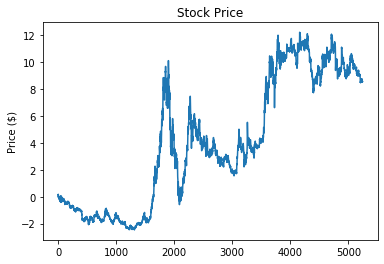

In [6]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.plot(df.index, df['Closing Price'])
plt.title('Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import fbprophet

# Changepoint prior scale selection
df_fb = df.rename(columns={'Date': 'ds', 'Closing Price': 'y'})
def change_point_selection(df_fb,prior_range):
    train, test = train_test_split(df_fb[['ds','y']], test_size=0.2)
    
    test_error = []
    train_error = []
    
    for changepoint in prior_range:
        model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
        model.fit(train)
        
        yhat_train = model.predict(train)['yhat']
        yhat_test = model.predict(test)['yhat']
        
        train_error.append(metrics.mean_squared_error(yhat_train,train['y']))
        test_error.append(metrics.mean_squared_error(yhat_test,test['y']))
    
    error = {'prior_range':prior_range,'train_error':train_error,'test_error':test_error}
    error = pd.DataFrame(error)
    plt.figure(figsize=(10, 8))
    plt.plot(error['prior_range'], error['train_error'], 'b-', label = 'train error')
    plt.plot(error['prior_range'], error['test_error'], 'r-', label = 'test error')
    plt.xlabel('prior range'); plt.ylabel('MSE'); plt.title('MSE of Train vs Test')
    plt.legend();
    return error

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1

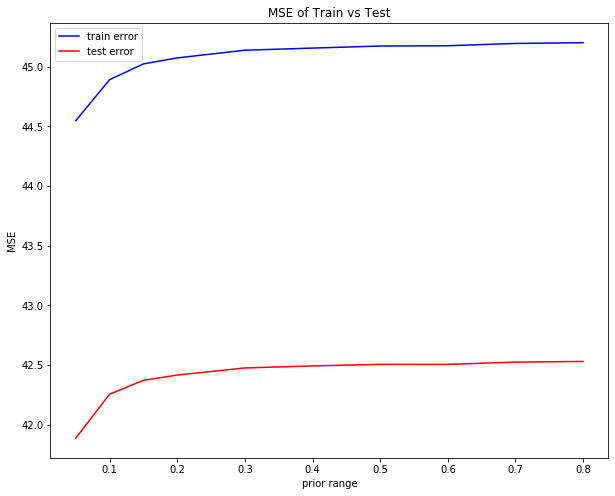

In [8]:
result = change_point_selection(df_fb,[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
change_point = result.where(result['test_error']==min(result['test_error']))

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


Potential 10 change points:
168    2000-07-28
336    2001-04-13
503    2001-12-20
671    2002-09-10
839    2003-06-11
1007   2004-02-23
1175   2004-11-01
1342   2005-07-13
1510   2006-06-01
1678   2007-02-09
Name: ds, dtype: datetime64[ns]


Text(0.5, 1, 'Stock Price Prediction')

<Figure size 720x576 with 0 Axes>

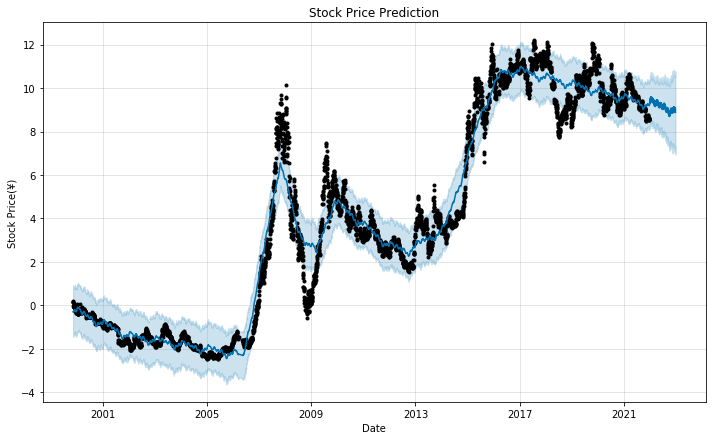

In [9]:
change_point = result['prior_range'].loc[result['test_error'] == min(result['test_error'])]

df_model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=change_point)
df_model.fit(df_fb)
    
df_future = df_model.make_future_dataframe(periods=365, freq='D')
df_future = df_model.predict(df_future)
 
print('Potential 10 change points:\n{}'.format(df_model.changepoints[:10]))
    

# Create the plot
plt.figure(figsize=(10, 8))
df_model.plot(df_future, xlabel = 'Date', ylabel = 'Stock Price(¥)')
plt.title('Stock Price Prediction')